In [55]:
#https://www.bricklink.com/v2/catalog/catalogitem.page?P=3070b#T=C
from bs4 import BeautifulSoup 
import pandas as pd
from PIL import Image 

In [56]:
file_path = "C:\\Users\\eamon\\Downloads\\legotiles.xlsx"

In [57]:
tilesLegoCode = pd.read_excel(file_path, index_col=0) 

In [58]:
tilesLegoCode.head(2)

,HEX,BricksetColour,Name,BricksetCode
ID,,,,
1,#212121,11,Black,6302
2,#0057A6,7,Blue,5174


In [59]:
#for index, row in tilesLegoCode.iterrows():
#    print(row['c1'], row['c2'])

In [60]:
image = Image.open('C:\\Users\\eamon\\Downloads\\profilepic.png')
image.thumbnail((7, 11))
image.save('image_thumbnail.png')
print(image.size) # Output: (400, 350)

(7, 7)


In [61]:
from PIL import Image
from numpy import asarray
import math
image = Image.open('C:\\Users\\eamon\\Coding\\image_thumbnail.png')
data = asarray(image)
#print(type(data))
#print(data.shape)
 #print(data)
# Return array to image
image2 = Image.fromarray(data)
#print(type(image2))
#print(data[2])

Height and width of original image: 492, 498
New height and width: 11, 7


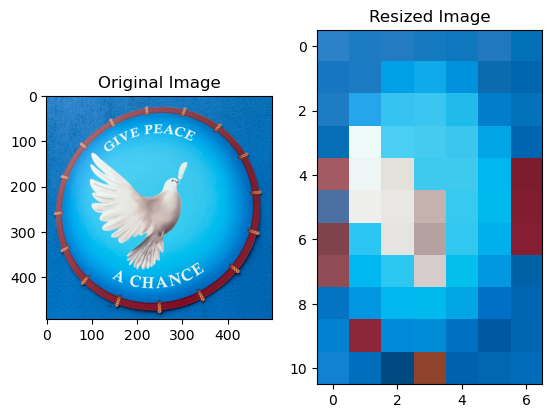

In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

#img = cv2.imread('C:\\Users\\eamon\\Downloads\\profilepic.png')
img = cv2.imread('E:\\iphone\\legopolaroid\\picturestouse\\legoimage1.png')

h, w, c = img.shape
print(f"Height and width of original image: {h}, {w}" )

# resize the image
new_size = (7, 11) # new_size=(width, height)
print(f"New height and width: {new_size[1]}, {new_size[0]}" )
resize_img = cv2.resize(img, new_size)

# Convert the images from BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resize_img = cv2.cvtColor(resize_img, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(img), plt.title("Original Image")
plt.subplot(122), plt.imshow(resize_img), plt.title("Resized Image")

plt.show()

In [65]:
rows,cols,_ = resize_img.shape

# method 2 1st approach
finalArray = [[""]*cols]*rows
originalArray =  [[0 for _ in range(cols)] for _ in range(rows)]

for i in range(rows):
    for j in range(cols):
        k = resize_img[i,j]
        r,g,b = k
        #print(i,j, f"#{r:02x}{g:02x}{b:02x}")
        originalArray[i][j] = '#{:02x}{:02x}{:02x}'.format( r, g, b )

In [66]:
brickLinkColours = []
for index, row in tilesLegoCode.iterrows():
    #print(row['HEX'])
    brickLinkColours.append(row['HEX'])

In [67]:
def compare(input_hex: str,array) -> str:    
    colors =  array

    color_distance_list = []

    input_color = tuple(int(input_hex.lstrip('#')[i:i+2], 16) for i in (0, 2, 4))

    for i in range (len(colors)):
        use_color = colors[i]
        my_color = tuple(int(use_color.lstrip('#')[i:i+2], 16) for i in (0, 2, 4))
        get_distance = math.sqrt(sum([(a - b) ** 2 for a, b in zip(my_color, input_color)])) 
        color_distance_list.append(get_distance)

    sorted_color_distance_list = min(color_distance_list)
    closest_hex = color_distance_list.index(sorted_color_distance_list)

   
    return colors[closest_hex]


In [68]:
compare("#699cb9",brickLinkColours)

'#76A3C8'

In [69]:
rows, cols = (11, 7)
countArray = []
# method 2 1st approach
finalArray =  [[0 for _ in range(cols)] for _ in range(rows)]
originalArray =  [[0 for _ in range(cols)] for _ in range(rows)]

#img = Image.open('C:\\Users\\eamon\\Coding\\image_thumbnail.png')
#pixels = img.load() 
pixels = resize_img
width, height = (len(resize_img)),(len(resize_img[0]))
for y in range(height):      # this row
    for x in range(width):   # and this row was exchanged
        r, g, b,  = pixels[x, y]
        # in case your image has an alpha channel
        # r, g, b, a = pixels[x, y]
        originalArray[x][y] = '#{:02x}{:02x}{:02x}'.format( r, g, b )
        #print(pixels[x, y])
        #print(originalArray[x][y])
        finalValLego = compare(originalArray[x][y],brickLinkColours)
        finalArray[x][y] = finalValLego
        #print(x, y, f"#{r:02x}{g:02x}{b:02x}")
        countArray.append(finalValLego)

In [70]:
r, g, b, = resize_img[5][5]

resize_img[6][6] = '#{:02x}{:02x}{:02x}'.format( r, g, b )

ValueError: invalid literal for int() with base 10: '#00baed'

In [71]:
originalArray[0][3]

'#1479be'

In [72]:
width, height = (len(resize_img)),(len(resize_img[0]))
for y in range(height):      # this row
    for x in range(width):
        r, g, b,  = resize_img[x][y]
        originalArray[x][y] = '#{:02x}{:02x}{:02x}'.format( r, g, b )
        print(originalArray[x][y])


#2d81c8
#1676bf
#1e7cc5
#056eb5
#a25a63
#4b70a1
#80434c
#924c55
#0274c1
#0181d0
#1182d2
#1c7bc2
#1b7ac1
#25a5eb
#eefaf9
#edf6f4
#eeefec
#2cc6f4
#00b8f1
#0096e2
#8b2738
#006ebc
#237bc1
#00a0e7
#37c3f1
#4acef3
#e4e0da
#e9e7e3
#e6e4e0
#2dc8f2
#00b8ee
#0088d9
#004981
#1479be
#0faaea
#3ac6f0
#46cbf0
#3dcaee
#c5b2ae
#b5a19f
#d6cccb
#00baed
#008cd7
#8f432a
#0e77be
#0091dc
#1fbbec
#3ac6ee
#3dcaee
#36caf0
#32c7ef
#02bfec
#00a6e4
#0070c2
#0062ae
#2079bf
#0c6bae
#007dcb
#00a5e5
#00b7ee
#00baed
#00afec
#0097df
#0070c4
#0058a2
#0067b0
#0170b7
#0066ae
#0273bb
#0065b0
#7c1c2d
#801d2f
#851e32
#0062a6
#0065b2
#0066b1
#006cba


In [73]:
df = pd.DataFrame(finalArray).T
df.to_excel(excel_writer = "C:\\Users\\eamon\\Downloads\\image3Lego.xlsx")

In [74]:
finalArray[10][5]

'#0057A6'

In [75]:
df.head(99)

,0,1,2,3,4,5,6,7,8,9,10
0,#009FE0,#0057A6,#009FE0,#0057A6,#99663E,#595D60,#82422A,#99663E,#0057A6,#009FE0,#009FE0
1,#0057A6,#0057A6,#009FE0,#EEEEEE,#EEEEEE,#EEEEEE,#009FE0,#009FE0,#009FE0,#82422A,#0057A6
2,#0057A6,#009FE0,#6ACEE0,#6ACEE0,#DCDCDC,#F1F2E1,#DCDCDC,#009FE0,#009FE0,#009FE0,#00296B
3,#0057A6,#009FE0,#6ACEE0,#6ACEE0,#6ACEE0,#C0C0C0,#9C9C9C,#DCDCDC,#009FE0,#009FE0,#82422A
4,#0057A6,#009FE0,#009FE0,#6ACEE0,#6ACEE0,#6ACEE0,#6ACEE0,#009FE0,#009FE0,#0057A6,#0057A6
5,#0057A6,#0057A6,#009FE0,#009FE0,#009FE0,#009FE0,#009FE0,#009FE0,#0057A6,#0057A6,#0057A6
6,#0057A6,#0057A6,#0057A6,#0057A6,#6A0E15,#6A0E15,#82422A,#0057A6,#0057A6,#0057A6,#0057A6


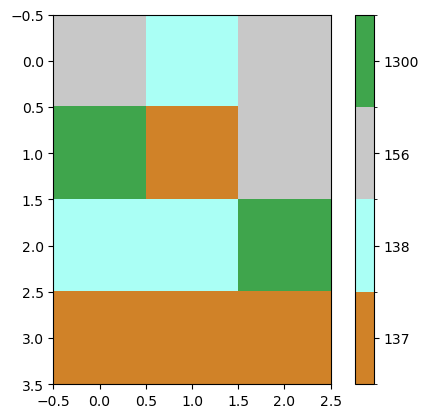

In [76]:
#https://stackoverflow.com/questions/47776318/plotting-a-2d-numpy-array-with-custom-colors
a =np.array([[156, 138, 156],
             [1300, 137, 156],
             [138, 138, 1300],
             [137, 137, 137]])

ca = np.array([[156,200,200,200],
               [138,170,255,245],
               [137,208,130,40],
               [1300,63,165,76]])

u, ind = np.unique(a, return_inverse=True)
b = ind.reshape((a.shape))

colors = ca[ca[:,0].argsort()][:,1:]/255.
cmap = matplotlib.colors.ListedColormap(colors)
norm = matplotlib.colors.BoundaryNorm(np.arange(len(ca)+1)-0.5, len(ca))

plt.imshow(b, cmap=cmap, norm=norm)

cb = plt.colorbar(ticks=np.arange(len(ca)))
cb.ax.set_yticklabels(np.unique(ca[:,0]))

plt.show()

In [77]:
filename = 'savedImage.jpg'
  
# Using cv2.imwrite() method 
# Saving the image 
cv2.imwrite(filename, resize_img) 
  

True

In [78]:
#https://stackoverflow.com/questions/13167269/changing-pixel-color-python
from PIL import Image
pictureNew = Image.open("savedImage.jpg")

width, height = pictureNew.size
for x in range(width):
    for y in range(height):
        current_color = pictureNew.getpixel( (x,y) )
        ####################################################################
        # Do your logic here and create a new (R,G,B) tuple called new_color
        ####################################################################
        h = finalArray[y][x].lstrip('#')
        
        pictureNew.putpixel( (x,y), tuple(int(h[i:i+2], 16) for i in (0, 2, 4)))

In [79]:
finalArray[10][5]

'#0057A6'

In [80]:
h = finalArray[x][y].lstrip('#')
tuple(int(h[i:i+2], 16) for i in (0, 2, 4))

IndexError: list index out of range

In [81]:
testghghg, gdfgdfgdf = pictureNew.size()

TypeError: 'tuple' object is not callable

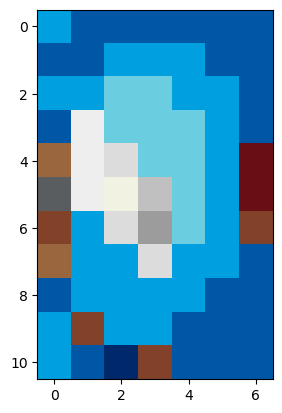

In [82]:
imgplot = plt.imshow(pictureNew)
plt.show()

In [83]:
pictureNew.save('legopolaroidimageonepic.jpg')

In [84]:
#https://hilliansbricks.co.uk/product/lego-1x1-tile-multiple-colours-3070b
from collections import Counter
Counter(countArray).keys() # equals to list(set(words))


dict_keys(['#009FE0', '#0057A6', '#99663E', '#595D60', '#82422A', '#EEEEEE', '#6ACEE0', '#DCDCDC', '#F1F2E1', '#00296B', '#C0C0C0', '#9C9C9C', '#6A0E15'])

In [85]:
Counter(countArray).values() # counts the elements' frequency

dict_values([25, 24, 2, 1, 4, 3, 9, 3, 1, 1, 1, 1, 2])

In [86]:
colour= ['#009FE0', '#0057A6', '#99663E', '#595D60', '#82422A', '#EEEEEE', '#6ACEE0', '#DCDCDC', '#F1F2E1', '#00296B', '#C0C0C0', '#9C9C9C', '#6A0E15']
countToBuy = [25, 24, 2, 1, 4, 3, 9, 3, 1, 1, 1, 1, 2]
colourNameArray = []
brickLinkId = []


for numList in range(len(colour)):
    brickLinkId.append(tilesLegoCode[tilesLegoCode.HEX.isin([colour[numList]])].values[0][3])
    colourNameArray.append(tilesLegoCode[tilesLegoCode.HEX.isin([colour[numList]])].values[0][2])
emptyFinal = pd.DataFrame( {'colour':colour,'count':countToBuy ,'colourName': colourNameArray, 'brickLinkId': brickLinkId})

In [24]:
tilesLegoCode[tilesLegoCode.HEX.isin(['#212121'])].values[0][3]

NameError: name 'tilesLegoCode' is not defined

In [25]:
colourNameArray

[]

In [26]:
emptyFinal

NameError: name 'emptyFinal' is not defined

In [87]:
emptyFinal.to_excel(excel_writer = "C:\\Users\\eamon\\Downloads\\finalCounttoBuy3.xlsx")